Najprej smo implentirali naš glavni in osnovni celoštevilski linerani program, ki vrne množico SDCTD dominacije, če obstaja in "Graf nima SDCTD", če le ta ne obstaja.



# 4.točka: Ker je graf

#

# G premera 2, lahko vsako vozlišče doseže katerokoli drugo vozlišče v največ dveh korakih. To pomeni, da je vsako vozlišče v dosegu vsakega drugega vozlišča bodisi neposredno bodisi prek vmesnega soseda. Ta lastnost omogoča, da pri določenih grafih število vozlišč v množici

# 𝐷

# D posplošimo glede na

# 𝑛



Ni splošne formule, vendar pa bo približno število vozlišč v D pogosto blizu polovici števila vseh vozlišč grafa, saj potrebujemo,

da vsaj polovica vozlišč sodeluje pri doseganju vseh vozlišč v dveh korakih.



In [4]:
#SDCTD število
def SDCTD_stevilo(g):
    h = g.complement()

    p = MixedIntegerLinearProgram(maximization = False)
    x = p.new_variable(binary = True)
    p.set_objective(sum([x[v] for v in g]))

    for v in g.vertices():
        neighbors = g.neighbors(v)  
        if neighbors:
            p.add_constraint(sum((x[w] + x[v]) for w in neighbors) >= 1)
        else:
            p.add_constraint(x[v] == 1)
            
    zaustavi = False

    for v in g.vertices():
        neighbors_complement = h.neighbors(v)  
        if neighbors_complement:  
            p.add_constraint(sum(x[w] for w in neighbors_complement) >= 1)

        else: 
            zaustavi = True
            break 

    if not zaustavi == True:
        p.solve()
        x = p.get_values(x)
        return(sum(1 for i in x.values() if i == 1))
    else:
        return 0

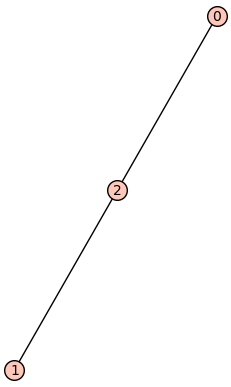

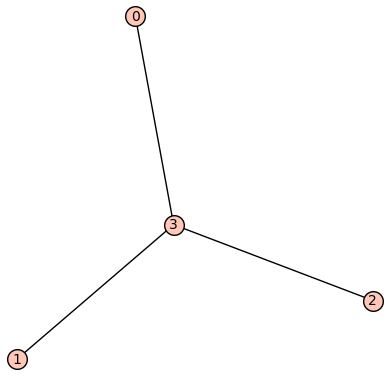

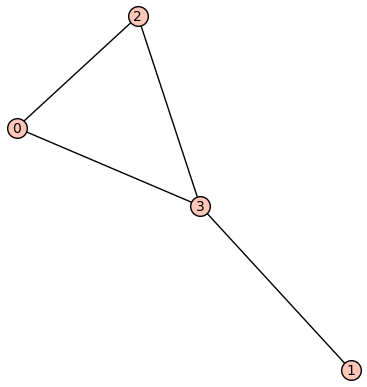

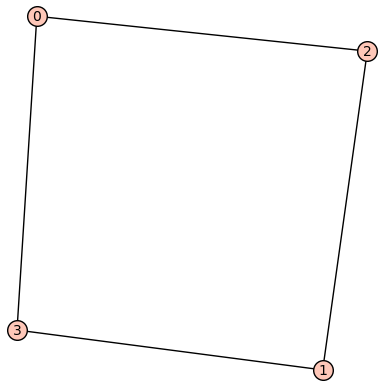

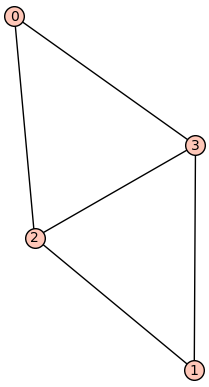

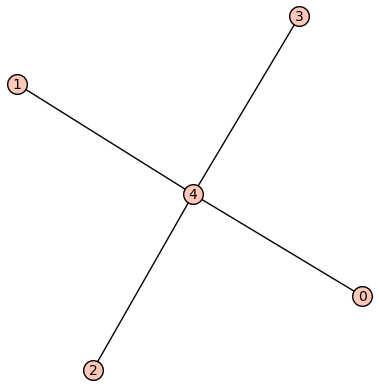

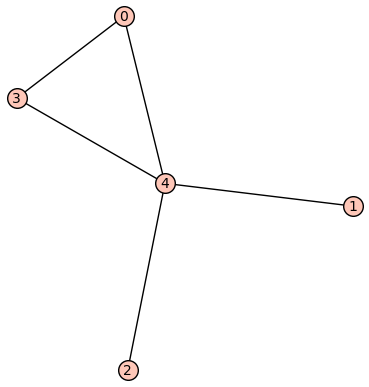

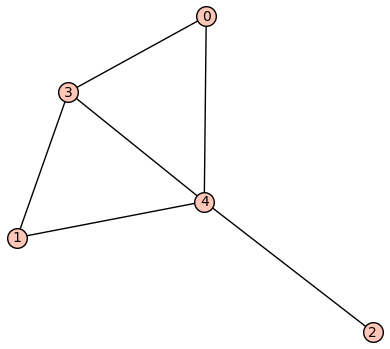

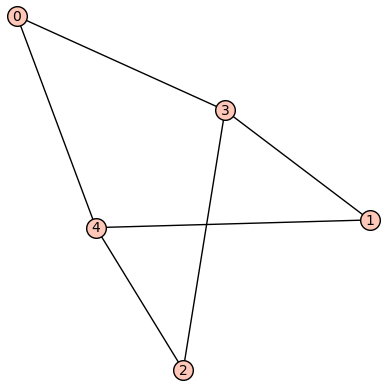

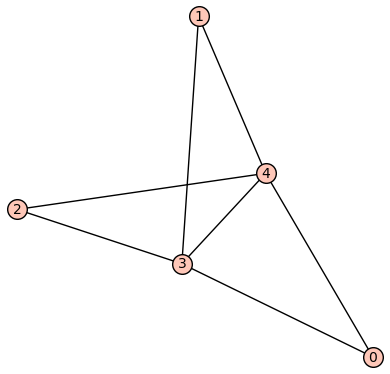

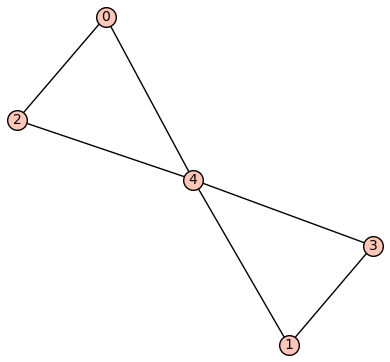

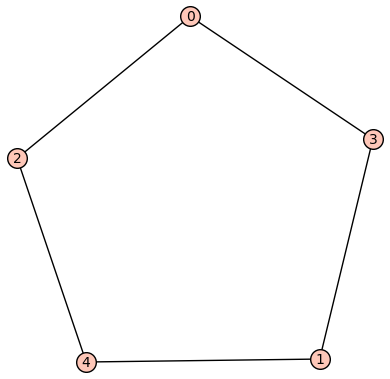

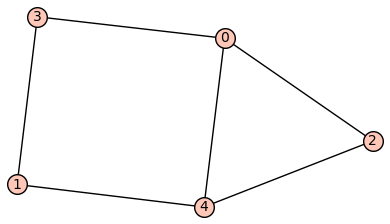

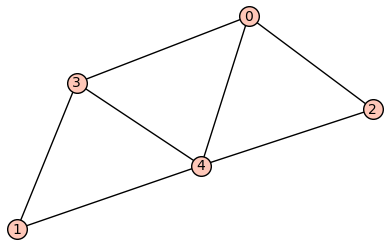

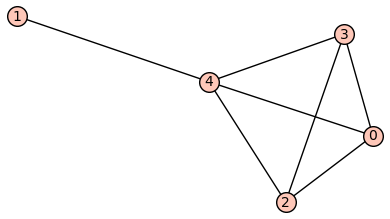

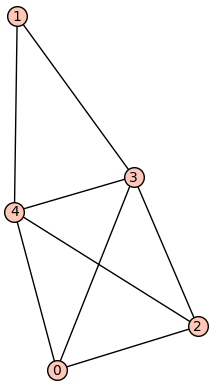

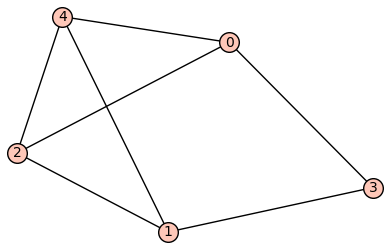

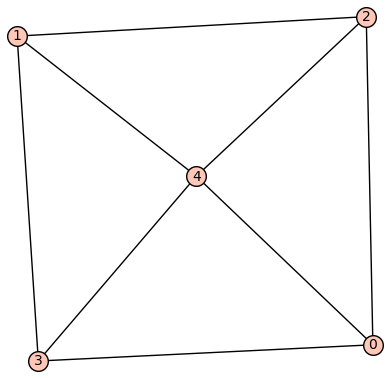

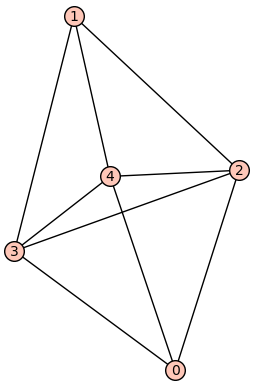

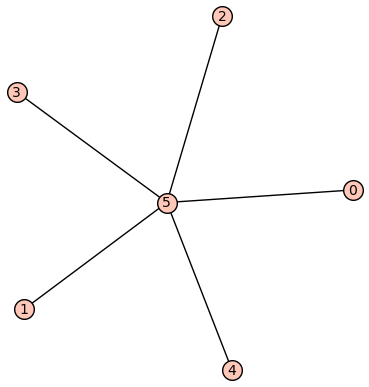

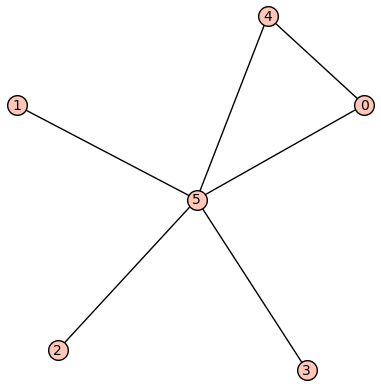

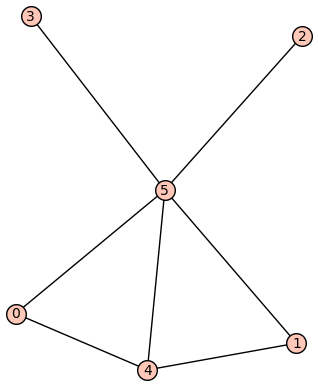

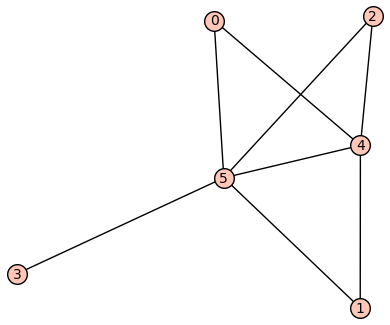

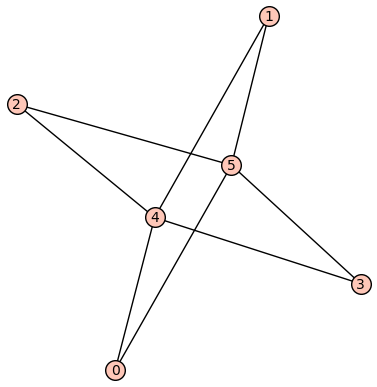

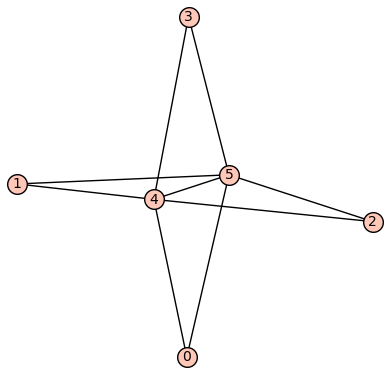

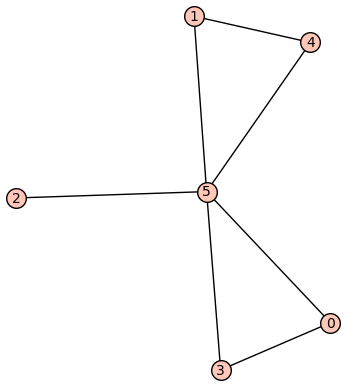

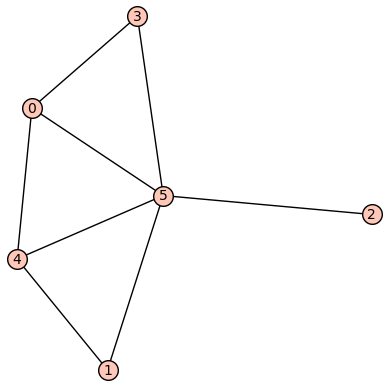

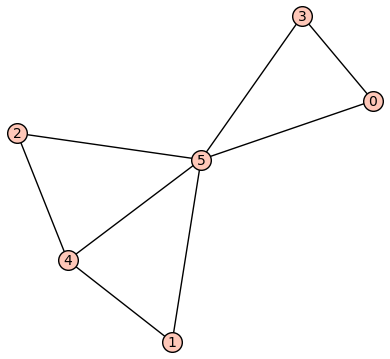

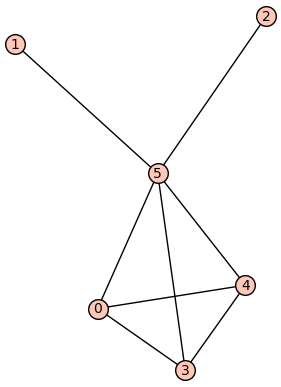

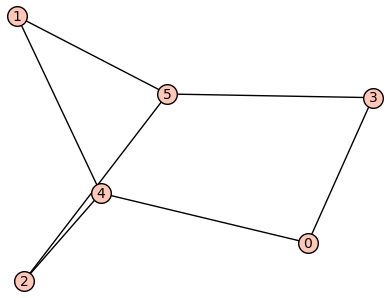

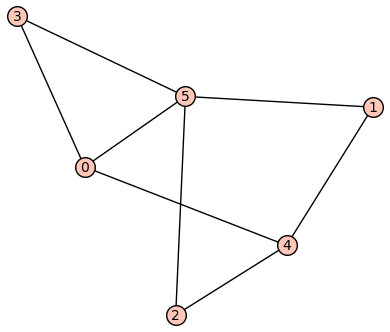

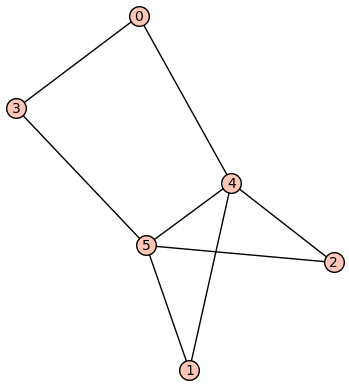

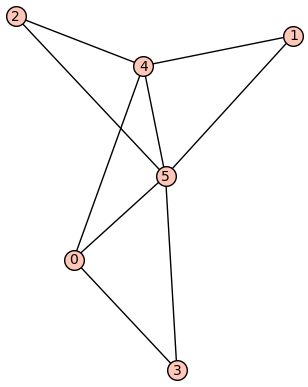

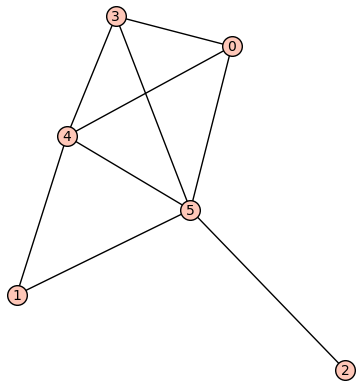

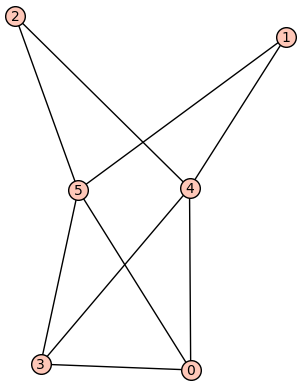

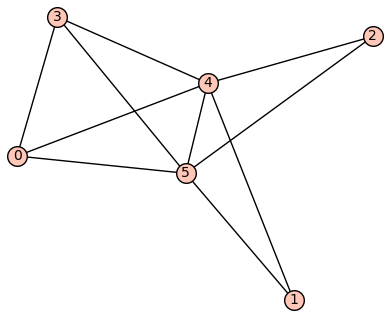

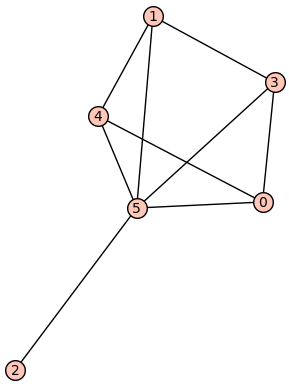

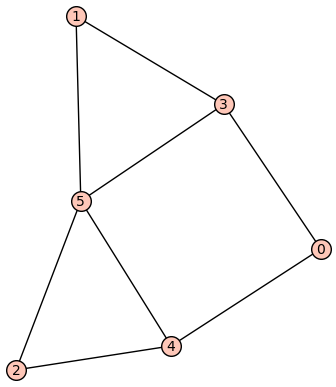

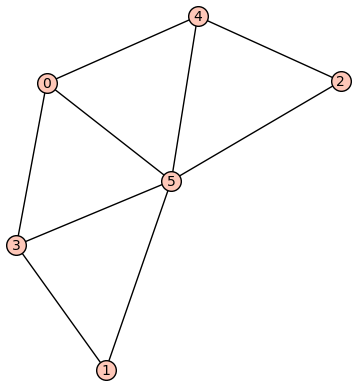

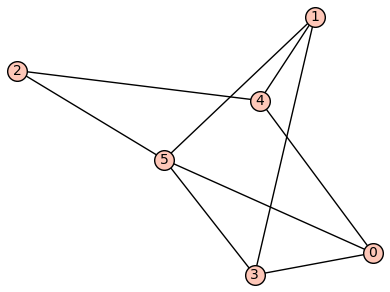

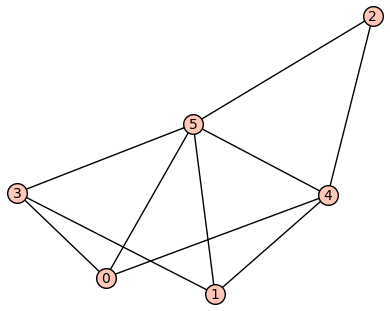

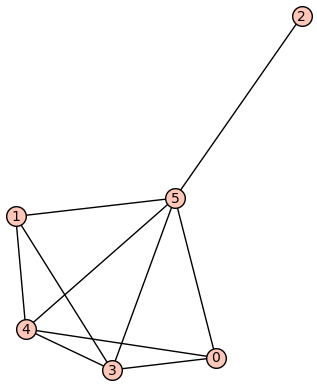

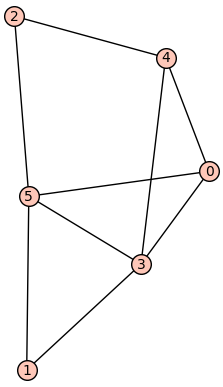

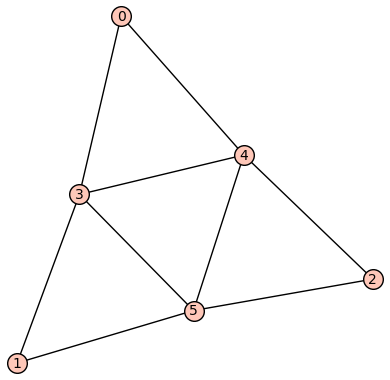

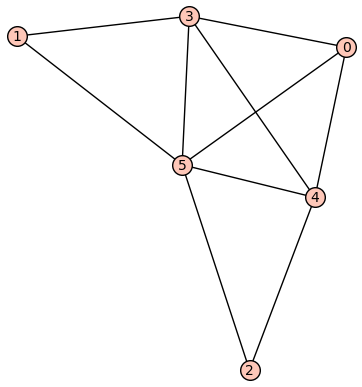

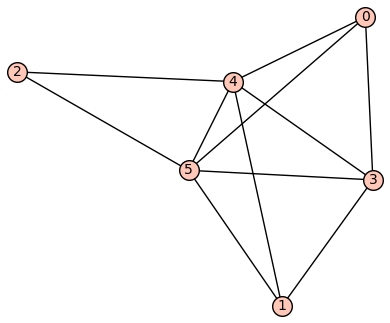

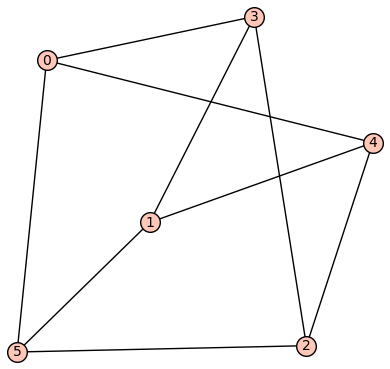

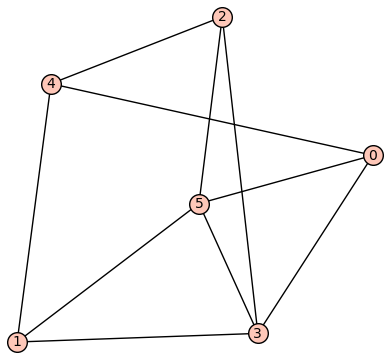

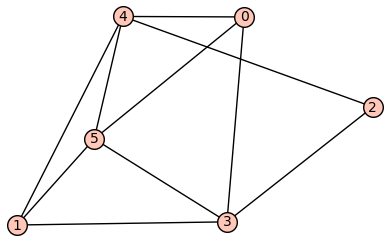

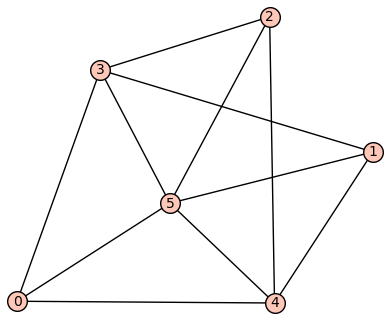

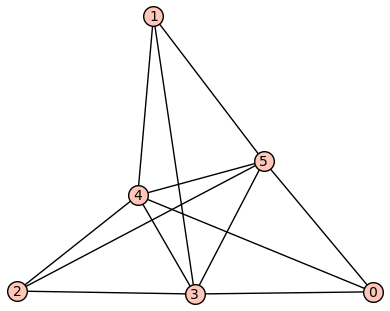

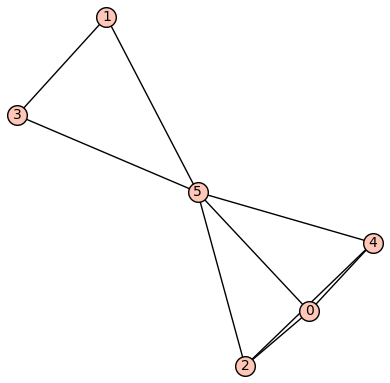

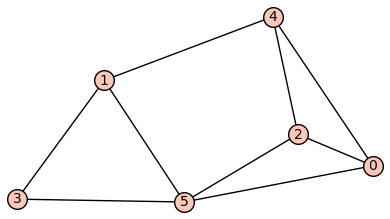

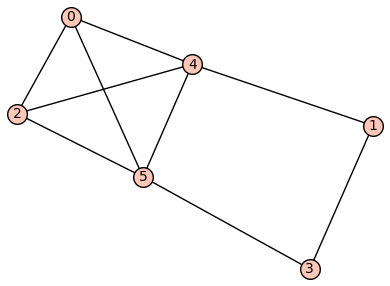

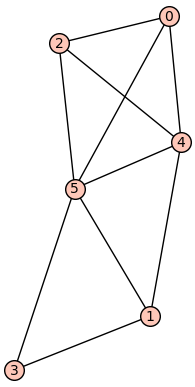

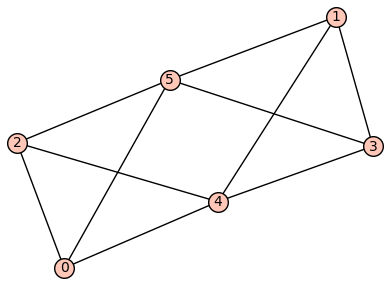

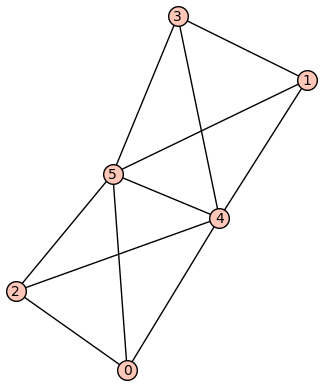

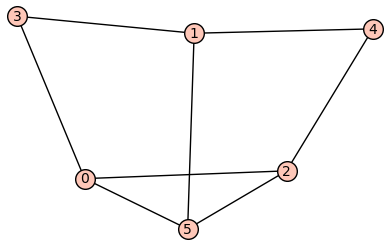

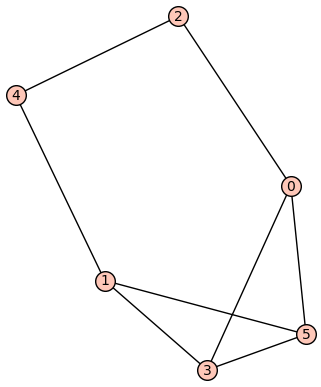

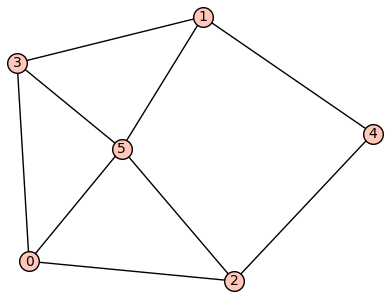

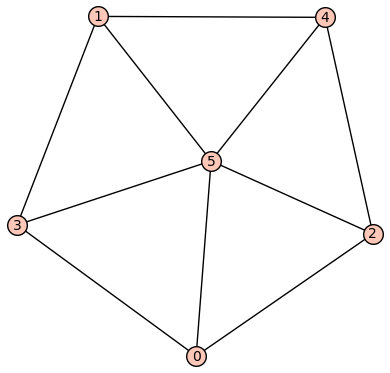

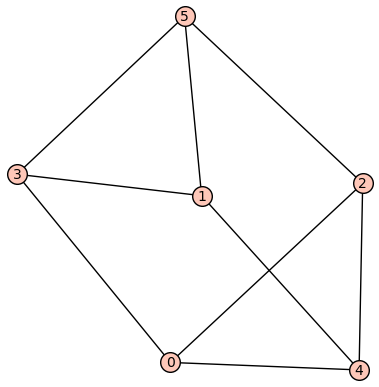

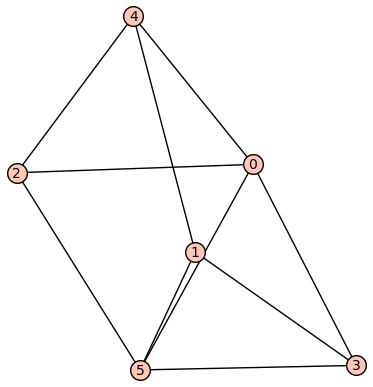

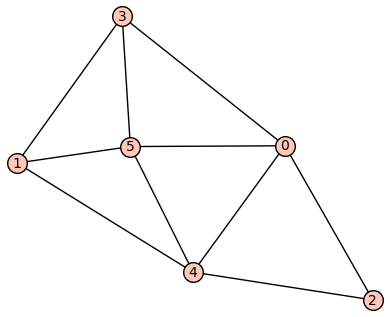

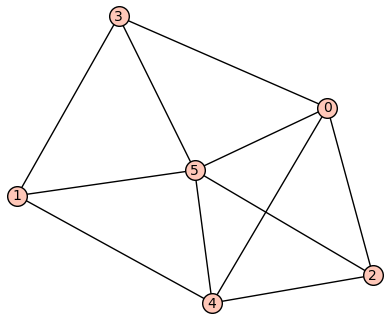

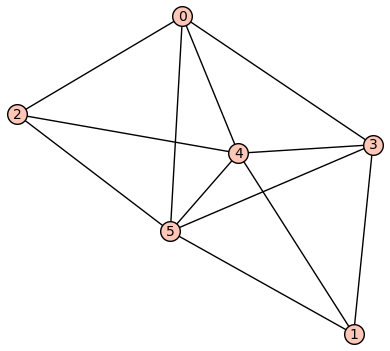

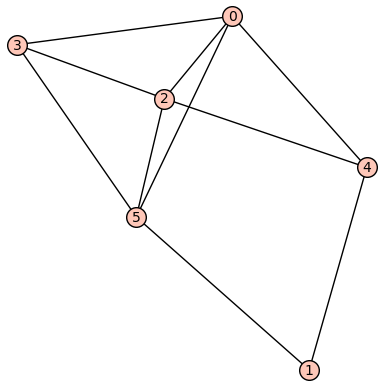

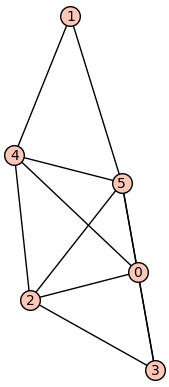

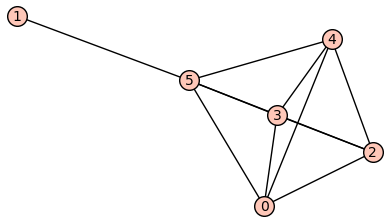

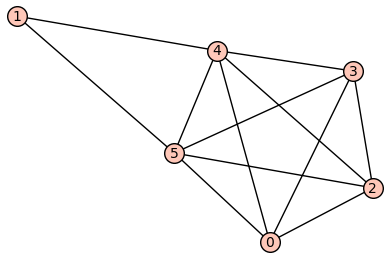

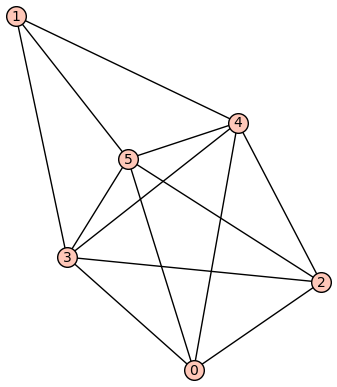

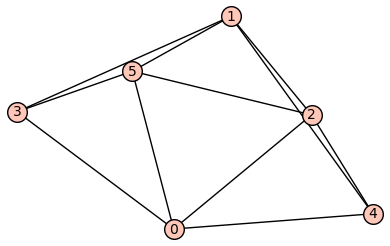

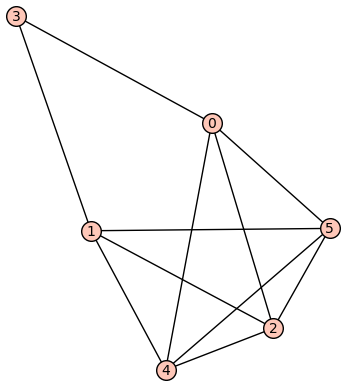

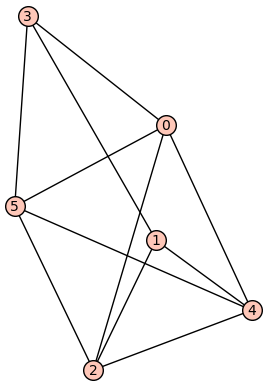

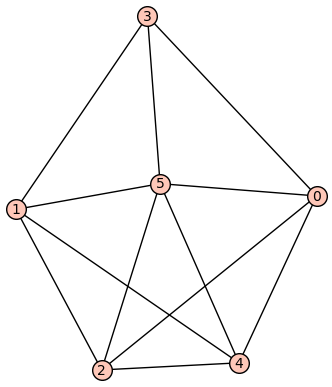

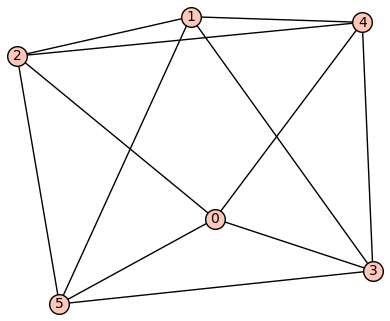

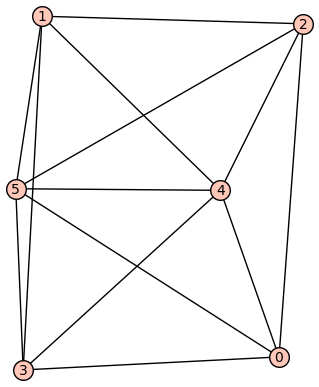

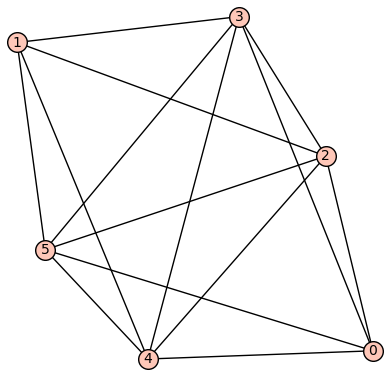

Tabela lastnosti grafov:
Št. vozlišč    Št. povezav    STCTD stevilo
----------------------------------------
3              2              0         
4              3              0         
4              4              0         
4              4              4         
4              5              0         
5              4              0         
5              5              0         
5              6              0         
5              6              4         
5              7              0         
5              6              0         
5              5              3         
5              6              3         
5              7              0         
5              7              0         
5              8              0         
5              7              4         
5              8              0         
5              9              0         
6              5              0         
6              6              0         
6              7             

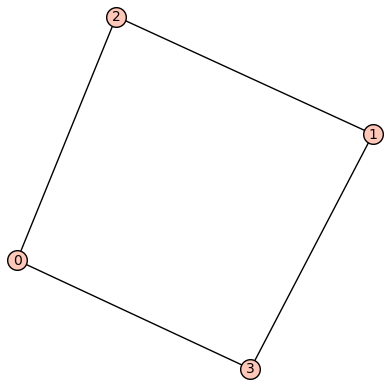

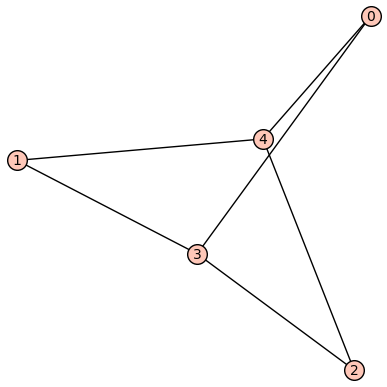

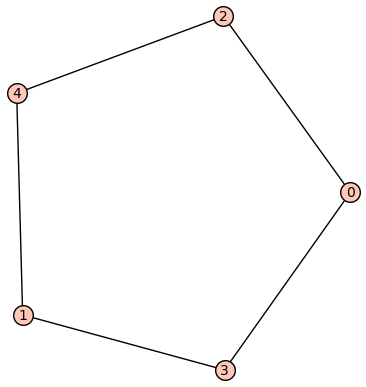

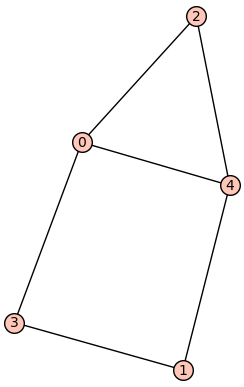

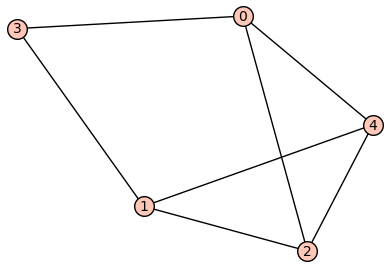

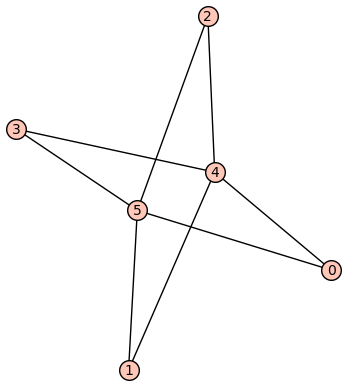

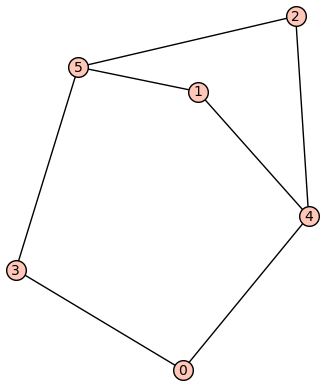

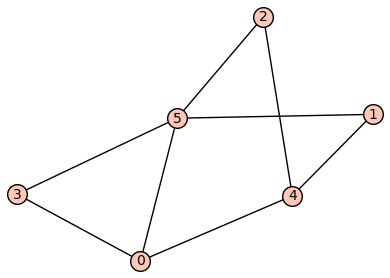

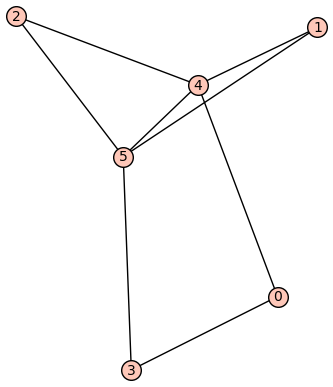

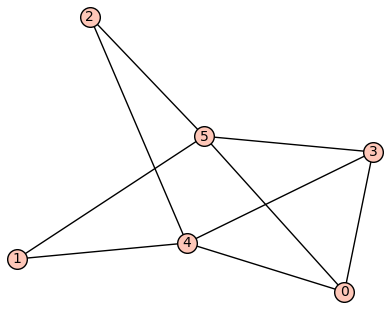

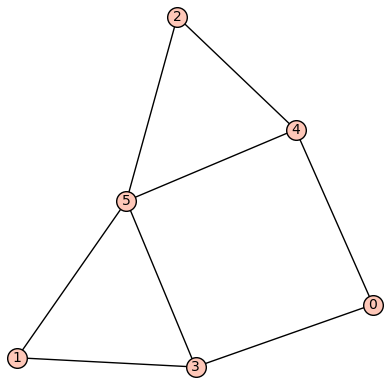

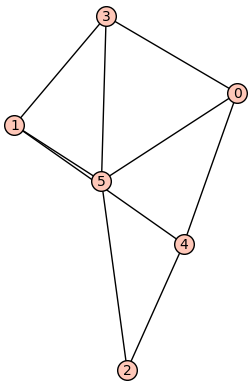

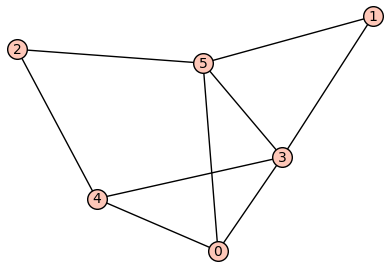

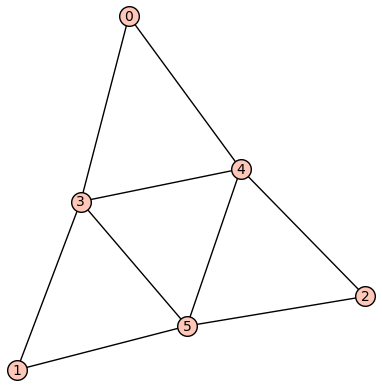

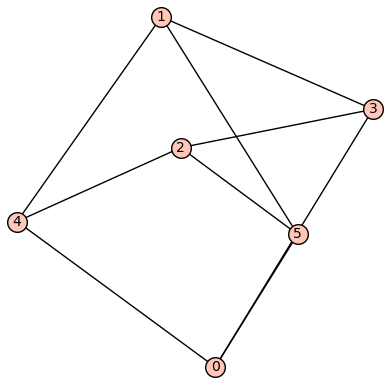

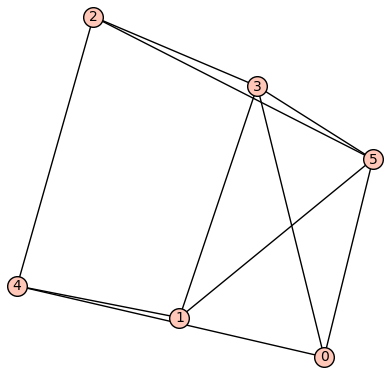

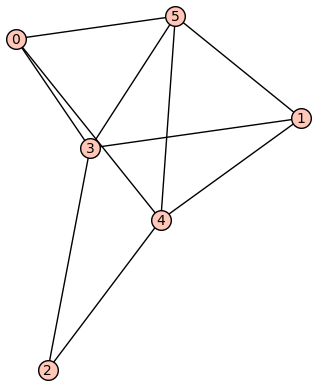

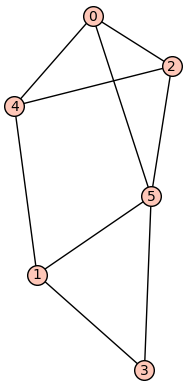

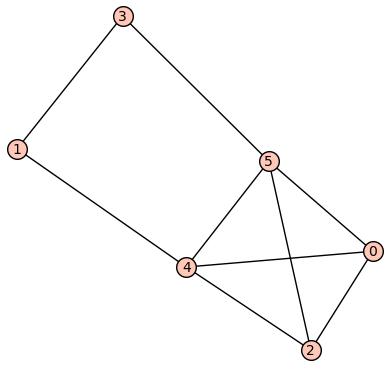

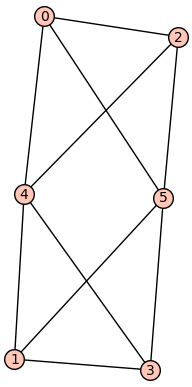

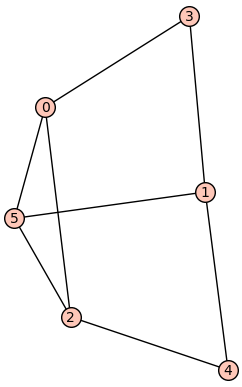

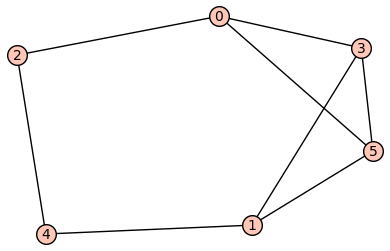

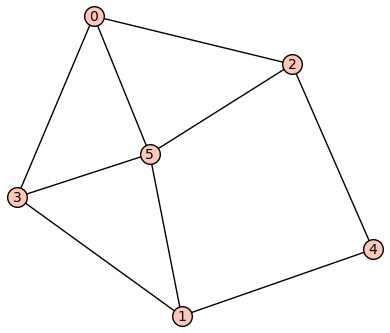

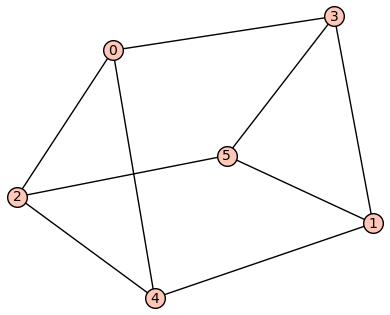

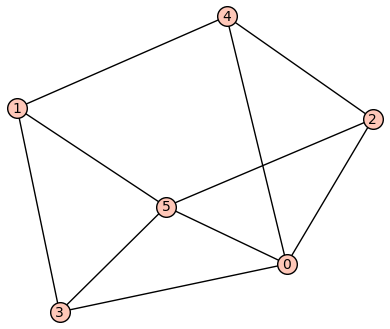

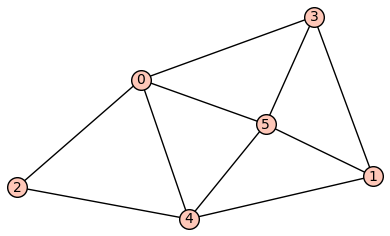

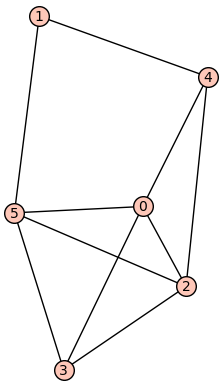

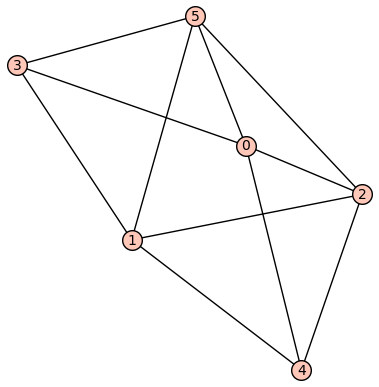

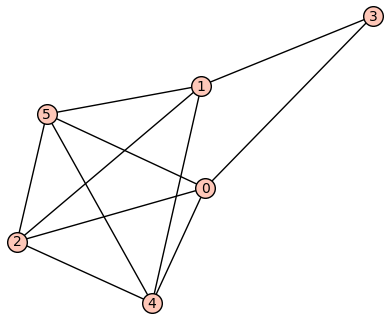

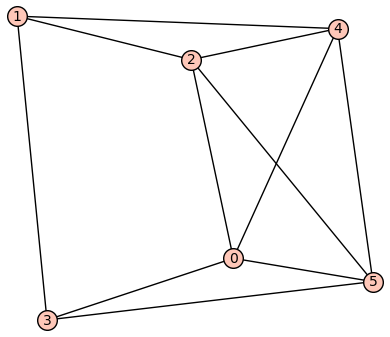

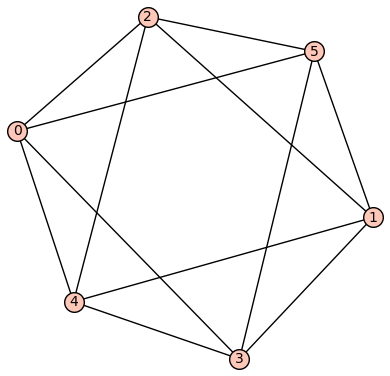

In [5]:
import random


grafi = []

for i in range(1, 7):
    for G in graphs.nauty_geng(f'{i} -c'):  
        grafi.append(G)
nov_graf = [] 
for graf in grafi:
    if graf.diameter() == 2:
        graf.show()
        nov_graf.append(graf)
    continue
    
    
tabela = []
for graf in nov_graf:
    vrstica = {
        "Število vozlišč": graf.order(),  # Število vozlišč
        "Število povezav": graf.size(),  # Število povezav
        "STCTD stevilo": SDCTD_stevilo(graf)
    }
    tabela.append(vrstica)

print("Tabela lastnosti grafov:")
print(f"{'Št. vozlišč':<15}{'Št. povezav':<15}{'STCTD stevilo':<10}")
print("-" * 40)
for vrstica in tabela:
    print(f"{vrstica['Število vozlišč']:<15}{vrstica['Število povezav']:<15}{vrstica['STCTD stevilo']:<10}")
    
for graf in nov_graf:
    if SDCTD_stevilo(graf) > 0:
        graf.show()
    


Opazka: če je katerikoli vozlišče v grafu stopnje n \- 1, pri čemer je n število vozlišč, sledi, da je STCTD število grafa enako 0. Recimo, da iz par takšnih grafov poskusimo odstraniti eno povezavo, ki gre iz take vrste vozlišča. Če to naredimo, bi se število moralo spremeniti. Recimo, poskusimo za tretji graf v zgornjem seznamu.


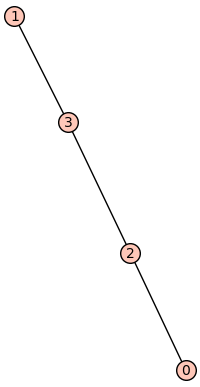

2


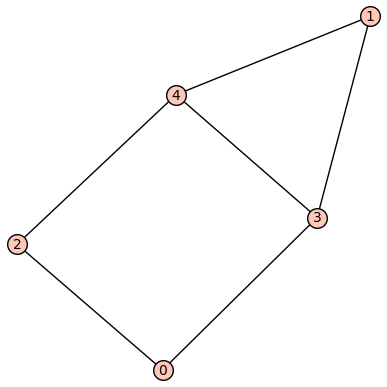

3


In [17]:
z = nov_graf[2]
z.delete_edge(0, 3)
z.show()
print(SDCTD_stevilo(z))

t = nov_graf[13]
t.delete_edge(0, 4)
t.show()
print(SDCTD_stevilo(t))

